In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
%%writefile /content/drive/MyDrive/fracture-detection/BoneFractureYolo8/data.yaml
train: /content/drive/MyDrive/fracture-detection/BoneFractureYolo8/train/images
val: /content/drive/MyDrive/fracture-detection/BoneFractureYolo8/val/images

nc: 7
names: ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

Overwriting /content/drive/MyDrive/fracture-detection/BoneFractureYolo8/data.yaml


In [ ]:
!python train.py --img 416 --batch 2 --epochs 30 \
--data /content/drive/MyDrive/fracture-detection/BoneFractureYolo8/data.yaml \
--weights yolov5s.pt --name fracture_demo_model --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      28/29     0.566G    0.04371   0.009106   0.005031          1        416:  63% 1144/1816 [01:28<00:44, 15.25it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      28/29     0.566G    0.04374   0.009101   0.005027          2        416:  63% 1146/1816 [01:28<00:44, 14.94it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      28/29     0.566G    0.04375   0.009106   0.005029          4        416:  63% 1146/1816 [01:28<00:44, 14.94it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.aut

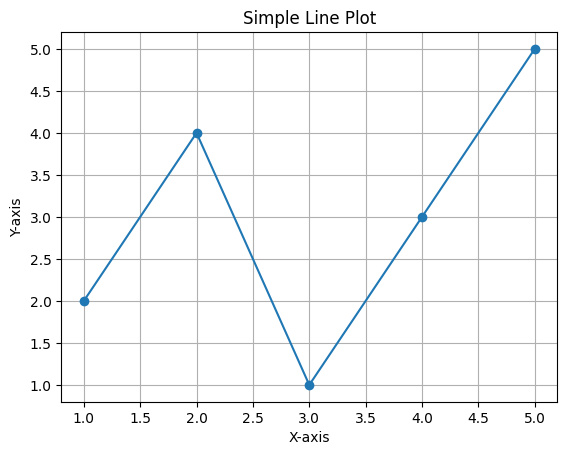

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Plotting
plt.plot(x, y, marker='o')
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

# Show the graph
plt.show()


In [ ]:
!cp /content/yolov5/runs/train/fracture_demo_model/weights/best.pt /content/drive/MyDrive/fracture-detection/best.pt

In [ ]:
results = model(filepath)
print(results)  # Add this

NameError: name 'model' is not defined

In [ ]:
import torch

# Load original checkpoint that was saved on Linux
ckpt = torch.load('best.pt', map_location='cpu')

# Save it in a way that works on Windows
torch.save(ckpt, 'best_windows.pt', _use_new_zipfile_serialization=False)

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL models.yolo.DetectionModel was not an allowed global by default. Please use `torch.serialization.add_safe_globals([DetectionModel])` or the `torch.serialization.safe_globals([DetectionModel])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [ ]:
import torch

# ✅ Load original checkpoint with full model (BE CAREFUL: only do this if you trust the file)
ckpt = torch.load('best.pt', map_location='cpu', weights_only=False)

# ✅ Save it in a Windows-friendly way
torch.save(ckpt, 'best_windows.pt', _use_new_zipfile_serialization=False)

print("Checkpoint converted successfully!")

ModuleNotFoundError: No module named 'models'

In [ ]:
# ✅ Run this on Colab or Linux system
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

import torch
from models.experimental import attempt_load

# ✅ Load model using YOLOv5 tools
model = attempt_load('/content/best.pt', map_location='cpu')

# ✅ Save in Windows-safe format
torch.save(model, '/content/best_windows.pt', _use_new_zipfile_serialization=False)

print("✅ Model converted! Download best_windows.pt")

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.62 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (12002/12002), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 

TypeError: attempt_load() got an unexpected keyword argument 'map_location'

In [ ]:
# ✅ Install & setup YOLOv5
%cd /content
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# ✅ Import and load model properly
import torch
from models.experimental import attempt_load
from utils.torch_utils import select_device

device = select_device('cpu')  # or '0' for GPU if needed

# ✅ Load your best.pt model
model = attempt_load('/content/best.pt', device=device)

# ✅ Save in Windows-compatible format
torch.save(model, '/content/best_windows.pt', _use_new_zipfile_serialization=False)

print("✅ Model converted and saved as best_windows.pt")


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs


✅ Model converted and saved as best_windows.pt


In [ ]:
from google.colab import files
files.download('/content/best_windows.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%cd yolov5


[Errno 2] No such file or directory: 'yolov5'
/content


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images


python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 19.92 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5


In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# STEP 1: Clone YOLOv5 and install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# STEP 2: Upload your model + image
from google.colab import files
uploaded = files.upload()  # Upload your 'best_windows.pt' and X-ray image (e.g. xray.jpg)

# STEP 3: Run YOLOv5 detection (edit image filename if different)
!python detect.py --weights best_windows.pt --img 640 --conf 0.25 --source xray.jpg

# STEP 4: Display result
from IPython.display import Image
Image(filename='runs/detect/exp/xray.jpg')


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.60 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5/yolov5


Saving msk-8-2.jpg to msk-8-2.jpg
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['best_windows.pt'], source=xray.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/detect.py", line 438, in <module>
    main(

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/xray.jpg'

In [ ]:
print(model.names)


NameError: name 'model' is not defined

In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best_windows.pt', force_reload=True)


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-7-25 Python-3.11.13 torch-2.6.0+cu124 CPU



Exception: [Errno 2] No such file or directory: 'best_windows.pt'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best_windows.pt to best_windows.pt


In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best_windows.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-7-25 Python-3.11.13 torch-2.6.0+cu124 CPU



Exception: 'DetectionModel' object has no attribute 'get'. Cache may be out of date, try `force_reload=True` or see https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading for help.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.60 MiB | 19.43 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5/yolov5/yolov5


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving msk-8-2.jpg to msk-8-2.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving best_windows.pt to best_windows.pt


In [ ]:
!python detect.py --weights best_windows.pt --source msk-8-2.jpg --conf 0.25 --img 640

detect: weights=['best_windows.pt'], source=msk-8-2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Traceback (most recent call last):
  File "/content/yolov5/yolov5/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/yolov5/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/yolov5/yolov5/yolov5/detect.py", line 166, in run
 

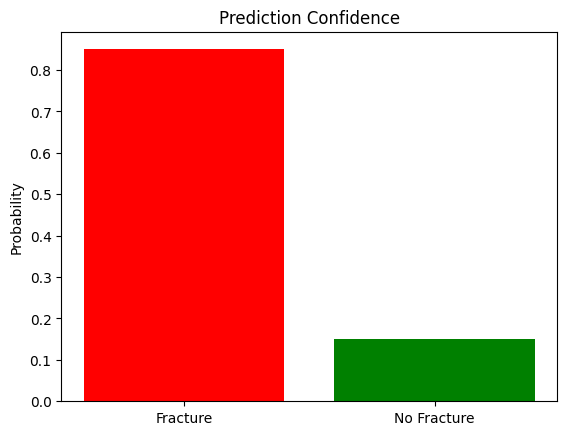

In [ ]:
import matplotlib.pyplot as plt

# Example: Binary classification output
classes = ['Fracture', 'No Fracture']
confidence = [0.85, 0.15]

plt.bar(classes, confidence, color=['red', 'green'])
plt.title("Prediction Confidence")
plt.ylabel("Probability")

plt.show()


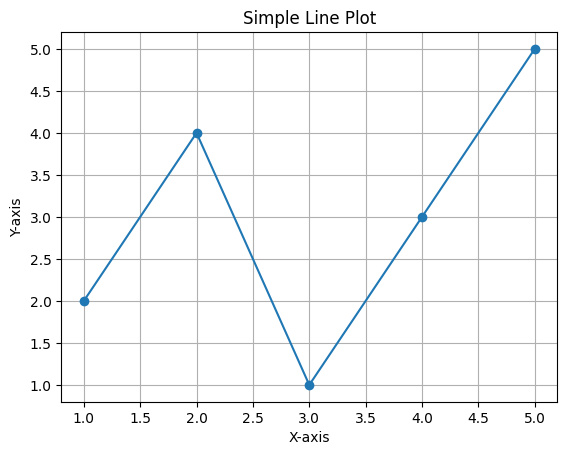

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]

# Plotting
plt.plot(x, y, marker='o')
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)

# Show the graph
plt.show()


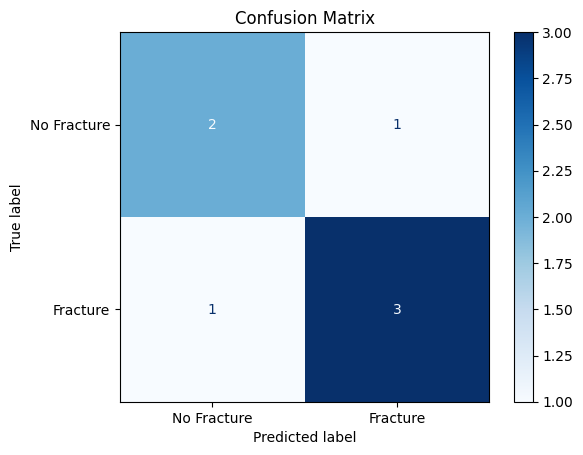

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = [1, 0, 1, 1, 0, 1, 0]  # Actual labels
y_pred = [1, 0, 1, 0, 0, 1, 1]  # Predicted labels

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fracture", "Fracture"])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'x': [1,2,3,4], 'y':[10,20,5,15]})
fig = px.line(df, x='x', y='y', title='Interactive Plotly Graph')

fig.show()


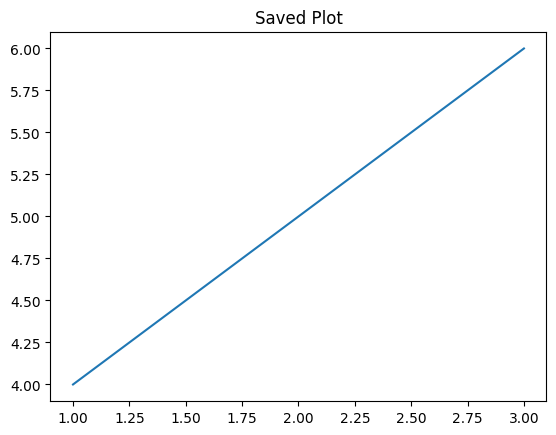

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Saved Plot")
plt.savefig("my_plot.png")  # Saves to Colab file system
plt.show()

# Download it
from google.colab import files
files.download("my_plot.png")


In [ ]:
predictions = [0.87, 0.13]  # [Fracture, No Fracture]
labels = ['Fracture', 'No Fracture']


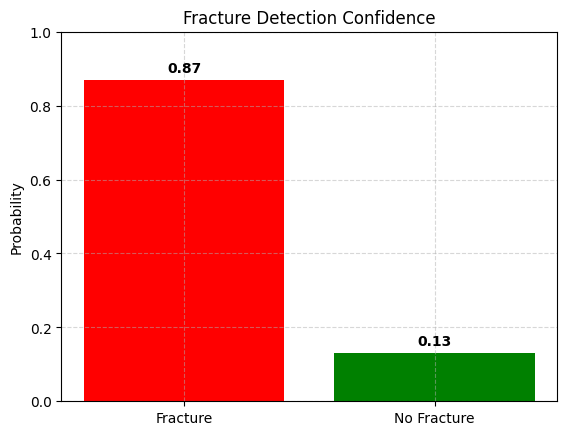

In [ ]:
import matplotlib.pyplot as plt

# Sample model output
predictions = [0.87, 0.13]
labels = ['Fracture', 'No Fracture']
colors = ['red', 'green']

# Plot
plt.bar(labels, predictions, color=colors)
plt.title("Fracture Detection Confidence")
plt.ylabel("Probability")
plt.ylim([0, 1])
plt.grid(True, linestyle='--', alpha=0.5)

# Show values on top
for i, v in enumerate(predictions):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()
